In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [260]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [261]:
data_df = pd.read_csv('data_dictionary.csv')

In [262]:
data_df

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [263]:
telecom_df = pd.read_csv('train.csv', sep=',')

In [264]:
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [265]:
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [266]:
telecom_df.shape

(69999, 172)

In [267]:
telecom_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

### Changing the dtypes of  the feature columns 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' to datetime. These feature columns are of dtype Object and hence will change them to datetime dtype

In [268]:
obj_columns = list(telecom_df.select_dtypes(include='object'))

In [269]:
for col in obj_columns:
    telecom_df[col] = pd.to_datetime(telecom_df[col])

In [270]:
telecom_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype         
---   ------                    --------------  -----         
 0    id                        69999 non-null  int64         
 1    circle_id                 69999 non-null  int64         
 2    loc_og_t2o_mou            69297 non-null  float64       
 3    std_og_t2o_mou            69297 non-null  float64       
 4    loc_ic_t2o_mou            69297 non-null  float64       
 5    last_date_of_month_6      69999 non-null  datetime64[ns]
 6    last_date_of_month_7      69600 non-null  datetime64[ns]
 7    last_date_of_month_8      69266 non-null  datetime64[ns]
 8    arpu_6                    69999 non-null  float64       
 9    arpu_7                    69999 non-null  float64       
 10   arpu_8                    69999 non-null  float64       
 11   onnet_mou_6               67231 non-null  float64       
 12   on

###  Drop all feature columns which has constant/unique value in the feature column(zero variance feature columns)

In [271]:
telecom_df = telecom_df[telecom_df.columns[telecom_df.nunique() > 1]]

In [272]:
telecom_df.shape

(69999, 159)

### Drop all feature columns which has morethan 80% null values

In [273]:
list(telecom_df.columns[telecom_df.isnull().sum()/len(telecom_df)*100 > 80])

[]

### Drop id column as it is just row indexing the data set

In [274]:
telecom_df.drop(['id'], axis=1, inplace=True)

### Let's analyse the feature columns based on our intuition
A customer leaving the operator network depend on the recharge patterns captured in this dataset for months 6,7,8. Lets collate all these features and analyse

In [275]:
recharge_cols=telecom_df.columns[telecom_df.columns.str.contains('rech_data|rech_amt')]
list(recharge_cols)

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [276]:
telecom_df[recharge_cols].isnull().sum()

total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
total_rech_data_6           52431
total_rech_data_7           52134
total_rech_data_8           51582
max_rech_data_6             52431
max_rech_data_7             52134
max_rech_data_8             51582
av_rech_amt_data_6          52431
av_rech_amt_data_7          52134
av_rech_amt_data_8          51582
dtype: int64

#### Finding out whether the missing values in the recharge_cols per month are corresponding to the same customer

In [277]:
# Checking for month 6
telecom_df.loc[telecom_df.total_rech_data_6.isnull() & telecom_df.date_of_last_rech_data_6.isnull() & telecom_df.max_rech_data_6.isnull() & telecom_df.av_rech_amt_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6", "max_rech_data_6", "av_rech_amt_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,NaN,NaT,NaN,NaN
1,NaN,NaT,NaN,NaN
2,NaN,NaT,NaN,NaN
3,NaN,NaT,NaN,NaN
5,NaN,NaT,NaN,NaN
6,NaN,NaT,NaN,NaN
8,NaN,NaT,NaN,NaN
9,NaN,NaT,NaN,NaN
11,NaN,NaT,NaN,NaN
12,NaN,NaT,NaN,NaN


In [278]:
# Checking for month 7
telecom_df.loc[telecom_df.total_rech_data_7.isnull() & telecom_df.date_of_last_rech_data_7.isnull() & telecom_df.max_rech_data_7.isnull() & telecom_df.av_rech_amt_data_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7", "max_rech_data_7", "av_rech_amt_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7,max_rech_data_7,av_rech_amt_data_7
0,NaN,NaT,NaN,NaN
2,NaN,NaT,NaN,NaN
3,NaN,NaT,NaN,NaN
5,NaN,NaT,NaN,NaN
6,NaN,NaT,NaN,NaN
8,NaN,NaT,NaN,NaN
9,NaN,NaT,NaN,NaN
10,NaN,NaT,NaN,NaN
11,NaN,NaT,NaN,NaN
12,NaN,NaT,NaN,NaN


In [279]:
# Checking for month 8
telecom_df.loc[telecom_df.total_rech_data_8.isnull() & telecom_df.date_of_last_rech_data_8.isnull() & telecom_df.max_rech_data_8.isnull() & telecom_df.av_rech_amt_data_8.isnull(), ["total_rech_data_8", "date_of_last_rech_data_8", "max_rech_data_8", "av_rech_amt_data_8"]].head(10)

,total_rech_data_8,date_of_last_rech_data_8,max_rech_data_8,av_rech_amt_data_8
0,NaN,NaT,NaN,NaN
1,NaN,NaT,NaN,NaN
2,NaN,NaT,NaN,NaN
3,NaN,NaT,NaN,NaN
5,NaN,NaT,NaN,NaN
6,NaN,NaT,NaN,NaN
8,NaN,NaT,NaN,NaN
9,NaN,NaT,NaN,NaN
10,NaN,NaT,NaN,NaN
11,NaN,NaT,NaN,NaN


### Missing Value Imputation
Count on Missing values for date_of_last_rech_data_x, total_rech_data_x, max_rech_data_x, av_rech_amt_data_x where x stands for 6,7,8 are same . So we can consider these values corresponding to a customer as not recharged. Hence imputing the missing values with 0 considering not recharged

In [280]:
for col in list(recharge_cols):
    telecom_df[col] = telecom_df[col].fillna(value=0)

There is month wise recharge amount for voice calls in the dataset but there is no monthwise recharge amount for mobile data. Lets compute monthwise recharge amount for mobile data and derive a new column. 
#### Monthwise data recharge amount is average data recharge amount per month times total number of data recharges

In [281]:
telecom_df['total_rech_data_amt_6'] = telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_rech_data_amt_7'] = telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']
telecom_df['total_rech_data_amt_8'] = telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8']

#### We can now drop the columns using which we computed monthwise data recharge amount to avoid multi-collinearity

In [282]:
telecom_df.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'], axis=1, inplace=True)

In [283]:
telecom_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 155 columns):
 #    Column                    Non-Null Count  Dtype         
---   ------                    --------------  -----         
 0    arpu_6                    69999 non-null  float64       
 1    arpu_7                    69999 non-null  float64       
 2    arpu_8                    69999 non-null  float64       
 3    onnet_mou_6               67231 non-null  float64       
 4    onnet_mou_7               67312 non-null  float64       
 5    onnet_mou_8               66296 non-null  float64       
 6    offnet_mou_6              67231 non-null  float64       
 7    offnet_mou_7              67312 non-null  float64       
 8    offnet_mou_8              66296 non-null  float64       
 9    roam_ic_mou_6             67231 non-null  float64       
 10   roam_ic_mou_7             67312 non-null  float64       
 11   roam_ic_mou_8             66296 non-null  float64       
 12   ro

In [284]:
telecom_df.isnull().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou_6             2768
loc_og_t2f_mou_7             2687
loc_og_t2f_mou_8             3703
loc_og_t2c_mou_6             2768
loc_og_t2c_mou_7             2687
loc_og_t2c_mou_8             3703
loc_og_mou_6                 2768
loc_og_mou_7                 2687
loc_og_mou_8  

### As the data recharge is not taken by certain customers for month x, these feature columns "arpu_3g_x", "arpu_2g_x", "night_pck_user_x", "count_rech_2g_x", "count_rech_3g_x", "fb_user_x" have NaN entry hence imputing them with 0 for months x = 6,7,8 for all customers

In [285]:
# Checking for month 6
len(telecom_df.loc[telecom_df.arpu_3g_6.isnull() & telecom_df.arpu_2g_6.isnull() & telecom_df.night_pck_user_6.isnull() & telecom_df.count_rech_2g_6.isnull() & telecom_df.count_rech_3g_6.isnull() & telecom_df.fb_user_6.isnull(), ["arpu_3g_6", "arpu_2g_6", "night_pck_user_6", "count_rech_2g_6", "count_rech_3g_6", "fb_user_6"]])

52431

In [286]:
# Checking for month 7
len(telecom_df.loc[telecom_df.arpu_3g_7.isnull() & telecom_df.arpu_2g_7.isnull() & telecom_df.night_pck_user_7.isnull() & telecom_df.count_rech_2g_7.isnull() & telecom_df.count_rech_3g_7.isnull() & telecom_df.fb_user_7.isnull(), ["arpu_3g_7", "arpu_2g_7", "night_pck_user_7", "count_rech_2g_7", "count_rech_3g_7", "fb_user_7"]])

52134

In [287]:
# Checking for month 8
len(telecom_df.loc[telecom_df.arpu_3g_8.isnull() & telecom_df.arpu_2g_8.isnull() & telecom_df.night_pck_user_8.isnull() & telecom_df.count_rech_2g_8.isnull() & telecom_df.count_rech_3g_8.isnull() & telecom_df.fb_user_8.isnull(), ["arpu_3g_8", "arpu_2g_8", "night_pck_user_8", "count_rech_2g_8", "count_rech_3g_8", "fb_user_8"]])

51582

In [288]:
data_recharge_dependent_cols = ["arpu_3g_6", "arpu_2g_6", "night_pck_user_6", "count_rech_2g_6", "count_rech_3g_6", "fb_user_6","arpu_3g_7", "arpu_2g_7", "night_pck_user_7", "count_rech_2g_7", "count_rech_3g_7", "fb_user_7","arpu_3g_8", "arpu_2g_8", "night_pck_user_8", "count_rech_2g_8", "count_rech_3g_8", "fb_user_8"]
for col in data_recharge_dependent_cols:
    telecom_df[col] = telecom_df[col].fillna(value=0)

In [289]:
telecom_df.isnull().sum()

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                 2768
onnet_mou_7                 2687
onnet_mou_8                 3703
offnet_mou_6                2768
offnet_mou_7                2687
offnet_mou_8                3703
roam_ic_mou_6               2768
roam_ic_mou_7               2687
roam_ic_mou_8               3703
roam_og_mou_6               2768
roam_og_mou_7               2687
roam_og_mou_8               3703
loc_og_t2t_mou_6            2768
loc_og_t2t_mou_7            2687
loc_og_t2t_mou_8            3703
loc_og_t2m_mou_6            2768
loc_og_t2m_mou_7            2687
loc_og_t2m_mou_8            3703
loc_og_t2f_mou_6            2768
loc_og_t2f_mou_7            2687
loc_og_t2f_mou_8            3703
loc_og_t2c_mou_6            2768
loc_og_t2c_mou_7            2687
loc_og_t2c_mou_8            3703
loc_og_mou_6                2768
loc_og_mou_7                2687
loc_og_mou_8                3703
std_og_t2t

### Separating features into numeric, categorical and datetime columns
As all the categorical features are one hot encoded, we will use unique_value counts as 2 as criteria for filtering categorical features

In [290]:
categorical_cols = []
numeric_cols = []
datetime_cols = []
for col in list(telecom_df.columns):
    if telecom_df[col].dtype in ["int64", "float64"]:
        if len(telecom_df[col].value_counts()) == 2:
            categorical_cols.append(col)
        else:
            numeric_cols.append(col)
    else:
        datetime_cols.append(col)

In [291]:
categorical_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_probability']

In [292]:
datetime_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [293]:
telecom_df.shape

(69999, 155)

### Drop datetime feature columns as these do not provide predictive power to the model

In [294]:
telecom_df = telecom_df.drop(datetime_cols, axis=1)

### Outlier Treatment

In [295]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [296]:
telecom_df = telecom_df.apply(cap_outliers, axis=0)

In [297]:
telecom_df[numeric_cols].isnull().sum().sort_values(ascending=False)

std_ic_t2m_mou_8         3703
og_others_8              3703
std_og_t2m_mou_8         3703
std_og_mou_8             3703
std_og_t2t_mou_8         3703
loc_ic_t2f_mou_8         3703
loc_og_mou_8             3703
std_ic_mou_8             3703
loc_og_t2c_mou_8         3703
isd_og_mou_8             3703
loc_og_t2f_mou_8         3703
spl_og_mou_8             3703
loc_og_t2m_mou_8         3703
spl_ic_mou_8             3703
std_ic_t2f_mou_8         3703
loc_og_t2t_mou_8         3703
std_og_t2f_mou_8         3703
std_ic_t2t_mou_8         3703
ic_others_8              3703
roam_ic_mou_8            3703
isd_ic_mou_8             3703
loc_ic_t2m_mou_8         3703
loc_ic_mou_8             3703
offnet_mou_8             3703
roam_og_mou_8            3703
loc_ic_t2t_mou_8         3703
onnet_mou_8              3703
isd_og_mou_6             2768
std_og_mou_6             2768
loc_ic_t2f_mou_6         2768
std_ic_t2f_mou_6         2768
loc_ic_t2m_mou_6         2768
spl_og_mou_6             2768
og_others_

### Impute Missing Values in numeric columns using SimpleImputer from sklearn

In [298]:
# using SIMPLE IMPUTE technique to impute missing values in the rest of the columns
from sklearn.impute import SimpleImputer

In [299]:
mean_imputer = SimpleImputer(strategy='mean')
telecom_df[numeric_cols] = mean_imputer.fit_transform(telecom_df[numeric_cols])

### Finding out High Valued Customers to whom Telecom Operator devises out plan to stop from being churned
High Value Customers: Finding out those customers who fall beyond 70 percentile of the average recharges done by the customers over 3 months for voice and data

In [300]:
avg_recharge_2 = (telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'] + telecom_df['total_rech_data_amt_6'] + telecom_df['total_rech_data_amt_7'])/2

In [301]:
telecom_filtered_df = telecom_df[avg_recharge_2 >= np.percentile(avg_recharge_2, 70.0)]

print("Dimensions of the filtered dataset:",telecom_filtered_df.shape)

Dimensions of the filtered dataset: (21013, 149)


In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

### Performing EDA to understand the influence of predictor variables on the target variable

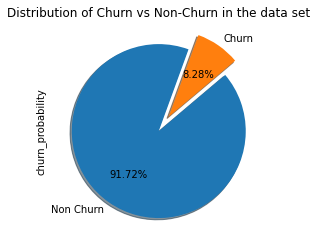

In [303]:
labels = "Non Churn", "Churn"
ax = telecom_filtered_df['churn_probability'].value_counts().plot(kind='pie', explode=[0,0.2], autopct='%1.2f%%', shadow=True, labels=labels, startangle=70)
ax.set_title("Distribution of Churn vs Non-Churn in the data set")
plt.show()

### Analysis: We can clearly see that there is a clear class imbalance in data w.r.t churn vs non-churn

In [304]:
telecom_filtered_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.160000,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.910000,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.330000,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,25.0,41.0,25.0,5.024812,5.548765,5.502004,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,4.871481,5.394443,5.346842,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,647.0,0.0,0.00,0.00,0,1225.0,1337.0,852.0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.430000,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.460000,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,602.847232,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,4.0,654.0,400.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,154.0,0.0,154.0,1.000000,0.000000,1.000000,0.0,0.0,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0.0,0.0,0.0,0.963443,0.0,0.978692,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,602.0,0.0,0.00,0.00,0,154.0,0.0,154.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,499.820129,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,899.997377,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202

In [305]:
rech_amount_cols = telecom_filtered_df.columns[telecom_filtered_df.columns.str.contains('total_rech_amt|total_rech_data_amt')]

In [306]:
df_churn = telecom_filtered_df[telecom_filtered_df['churn_probability'] == 1]
df_churn_no = telecom_filtered_df[telecom_filtered_df['churn_probability'] == 0]

<AxesSubplot:>

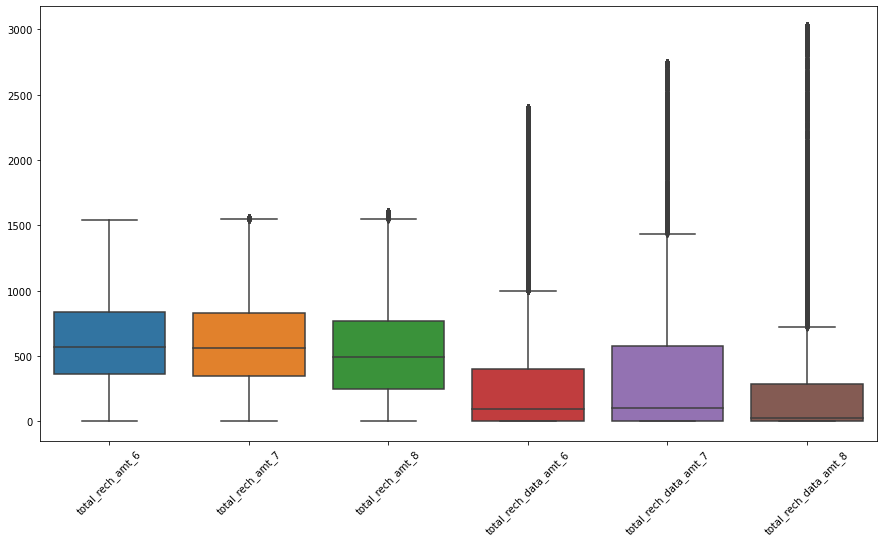

In [307]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = telecom_filtered_df[rech_amount_cols])

### Analysis: recharges of a fraction of high valued customers have come down in the eighth month.
Lets see in the below box plots on whose recharges are coming down in the eighth month

In [308]:
def plot_box_chart(col):
    plt.figure(figsize=(20,16))
    df = telecom_filtered_df
    plt.subplot(2,3,1)
    sns.boxplot(data=telecom_filtered_df, y=col+"_6",x="churn_probability",hue="churn_probability")
    plt.subplot(2,3,2)
    sns.boxplot(data=telecom_filtered_df, y=col+"_7",x="churn_probability",hue="churn_probability")
    plt.subplot(2,3,3)
    sns.boxplot(data=telecom_filtered_df, y=col+"_8",x="churn_probability",hue="churn_probability")
    plt.show()

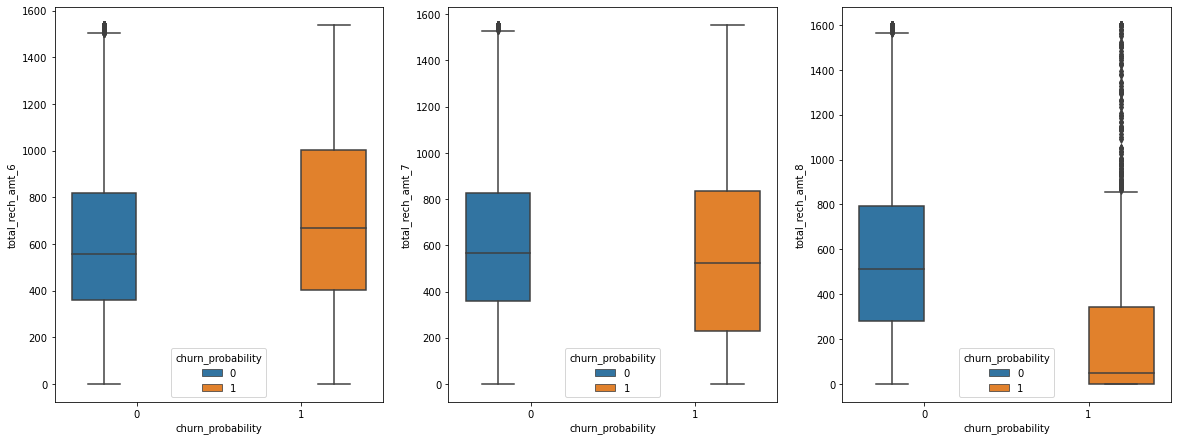

In [309]:
plot_box_chart('total_rech_amt')

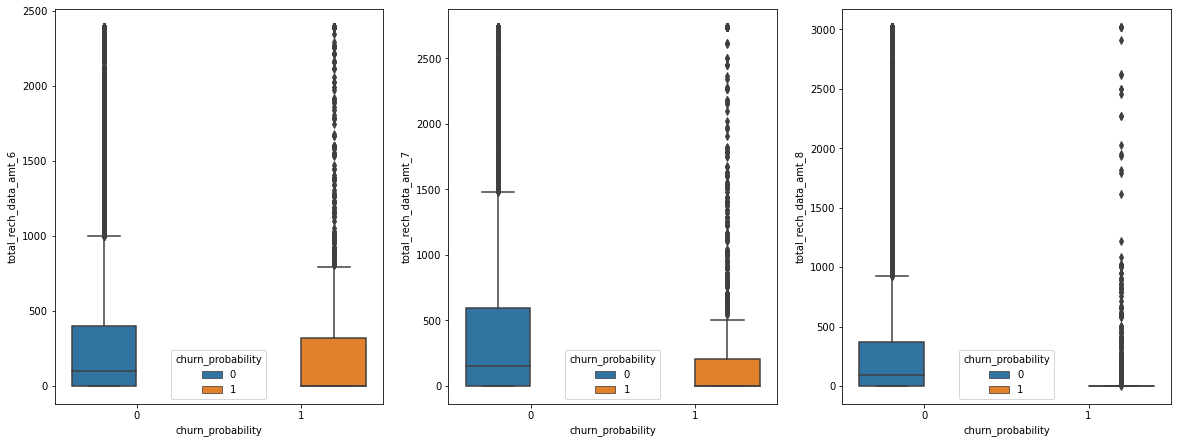

In [310]:
plot_box_chart('total_rech_data_amt')

### Analysis: It is evident from the above plots that recharges of certain high valued customers(with the intention of leaving the network operator) have drastically come down

### Lets examine the Minutes of usage as well as volume of data usage of the high valued customers for the three months

In [311]:
telecom_filtered_df.columns[telecom_filtered_df.columns.str.contains('vol')]

Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8'],
      dtype='object')

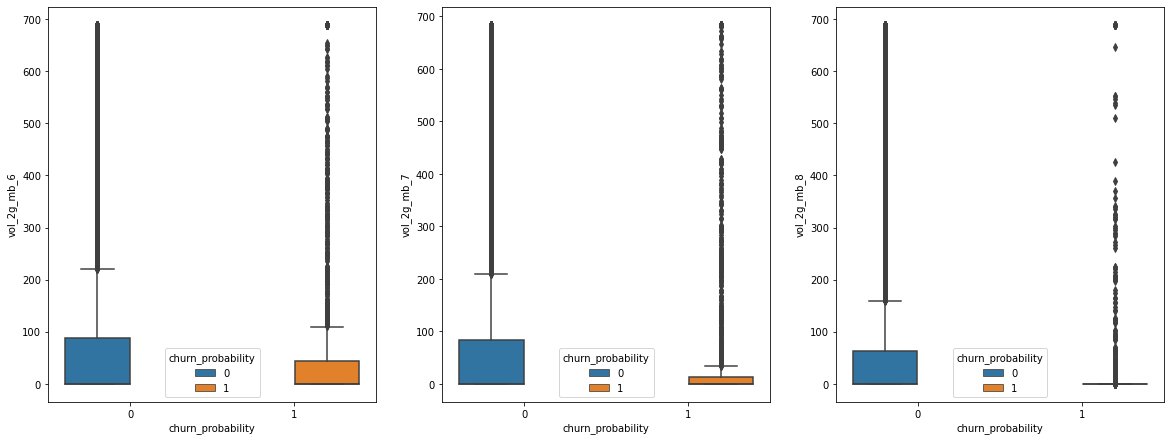

In [312]:
plot_box_chart('vol_2g_mb')

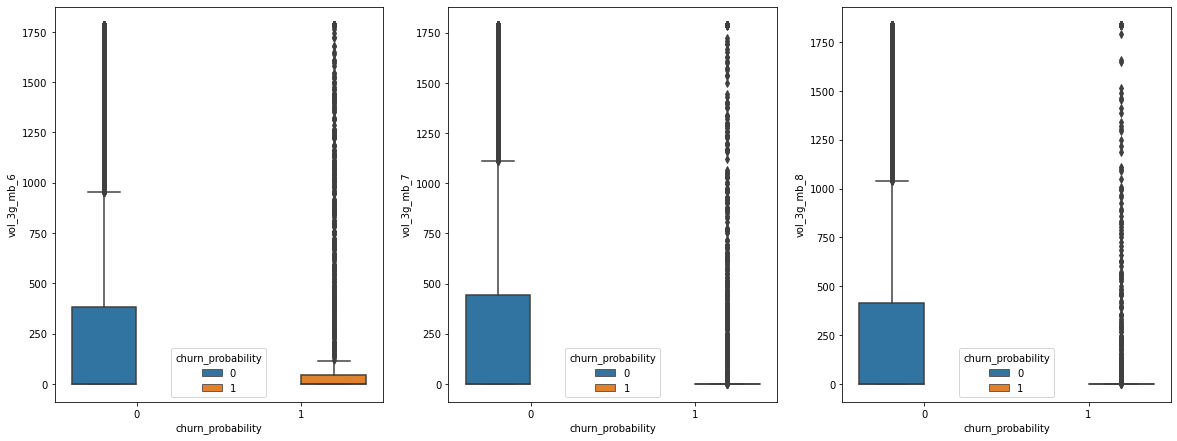

In [313]:
plot_box_chart('vol_3g_mb')

In [314]:
telecom_filtered_df.columns[telecom_filtered_df.columns.str.contains('mou')]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

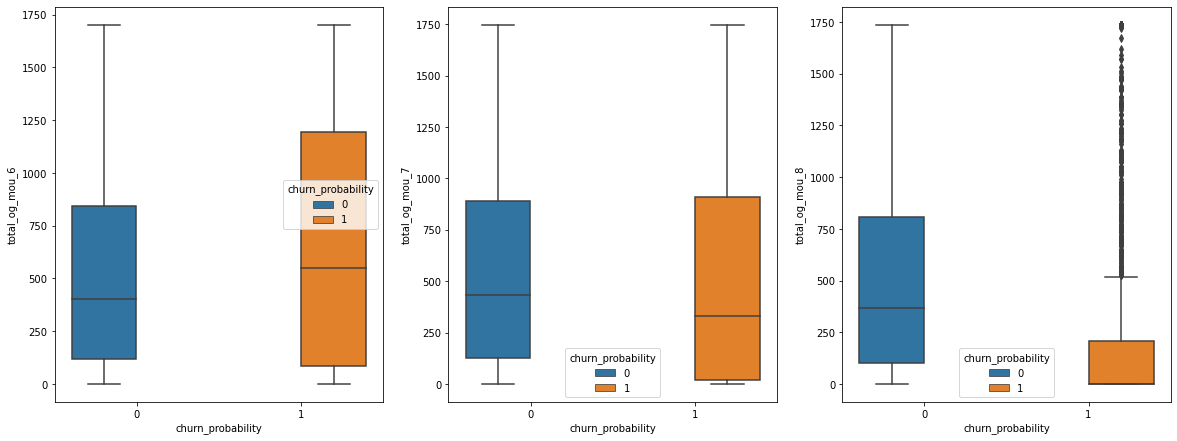

In [315]:
plot_box_chart('total_og_mou')

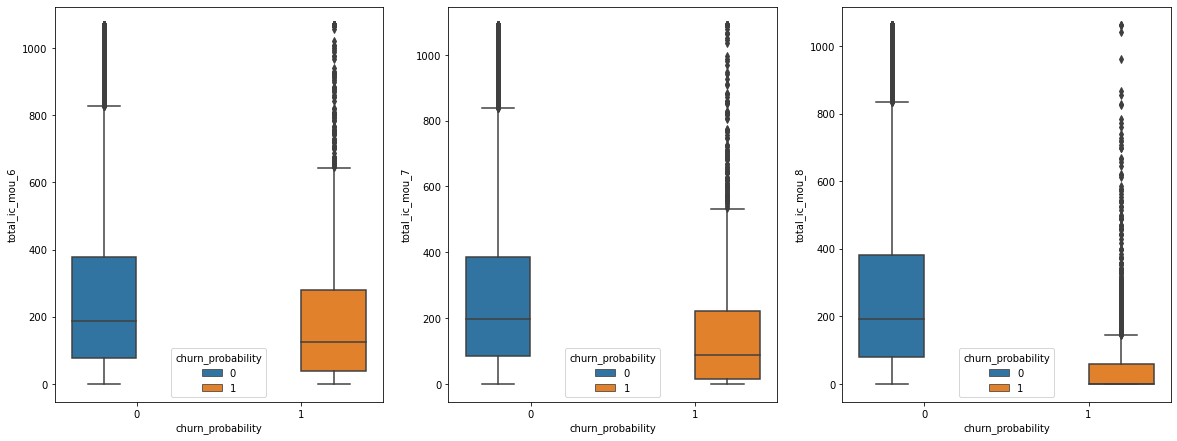

In [316]:
plot_box_chart('total_ic_mou')

### Analysis: It is evident from the above plots that minutes of usage as well as volume of data usage have come down drastically for the churning customers in the eighth month

### Lets examine the average revenue per user for voice and data recharges

In [317]:
telecom_filtered_df.columns[telecom_filtered_df.columns.str.contains('arpu')]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

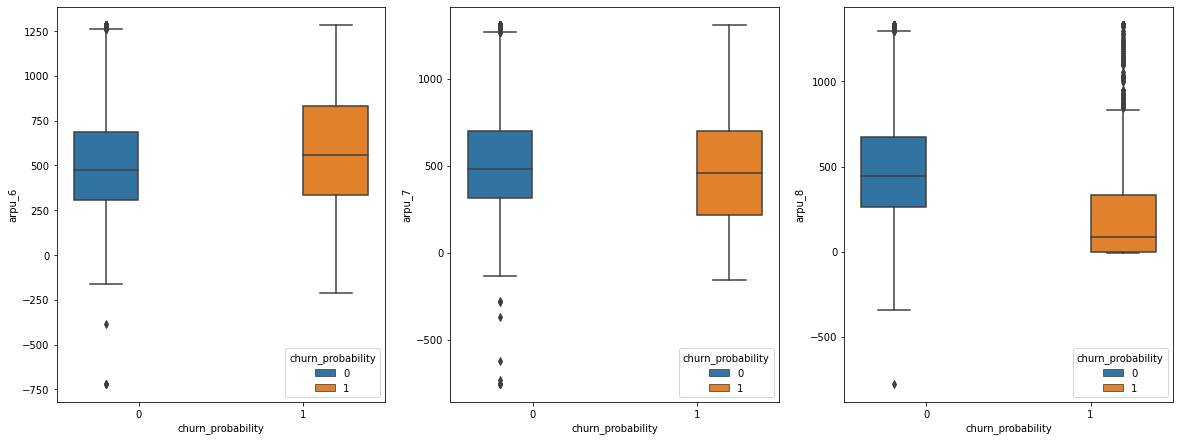

In [318]:
plot_box_chart('arpu')

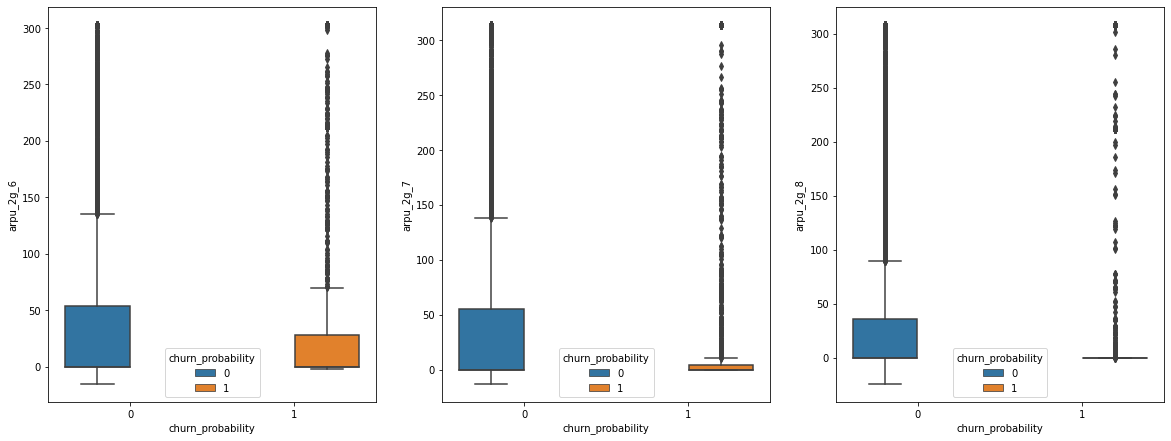

In [319]:
plot_box_chart('arpu_2g')

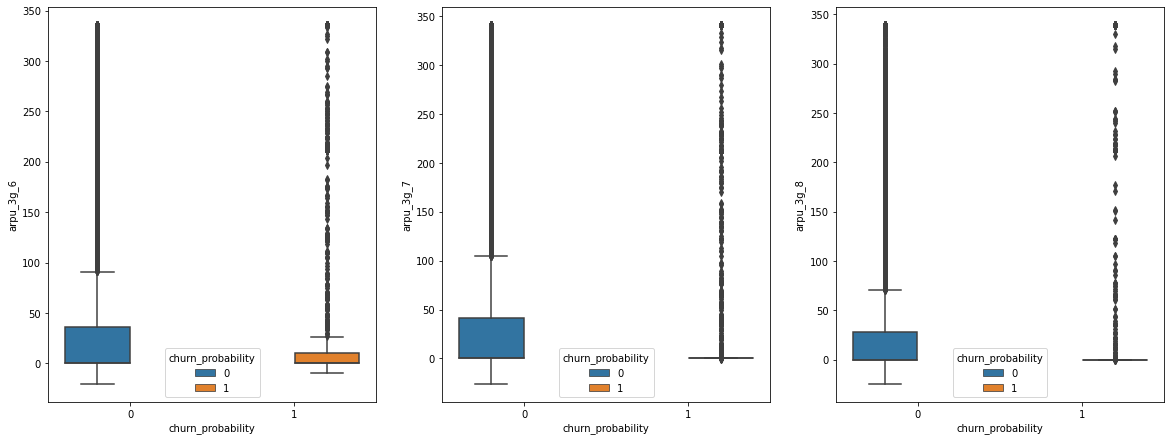

In [320]:
plot_box_chart('arpu_3g')

### Analysis: It is evident from the above plots that average revenue per user have come down drastically for the churning customers in the eighth month

### Checking Age on Network relationship with Churn Probability

In [321]:
telecom_filtered_df['aon'].describe()

count    21013.000000
mean      1210.422914
std        954.515340
min        180.000000
25%        461.000000
50%        854.000000
75%       1758.000000
max       4077.918672
Name: aon, dtype: float64

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

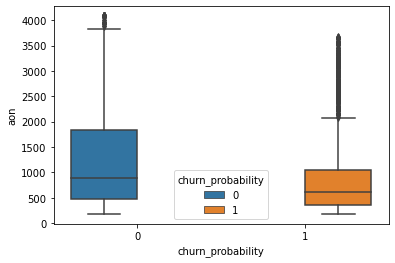

In [322]:
sns.boxplot(data = telecom_filtered_df, x='churn_probability', y='aon', hue='churn_probability')

Lets analyse whether short/long lived customers are churning more

In [323]:
tenure_df = telecom_filtered_df[['aon', 'churn_probability']]

In [324]:
tenure_df['aon'] = tenure_df['aon']//30

In [325]:
tenure_df['aon'].describe()

count    21013.000000
mean        39.862514
std         31.803693
min          6.000000
25%         15.000000
50%         28.000000
75%         58.000000
max        135.000000
Name: aon, dtype: float64

In [326]:
tnr_range = [0, 6, 12, 24, 60, 135]
tnr_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_df['tenure_range'] = pd.cut(tenure_df['aon'], tnr_range, labels=tnr_label)

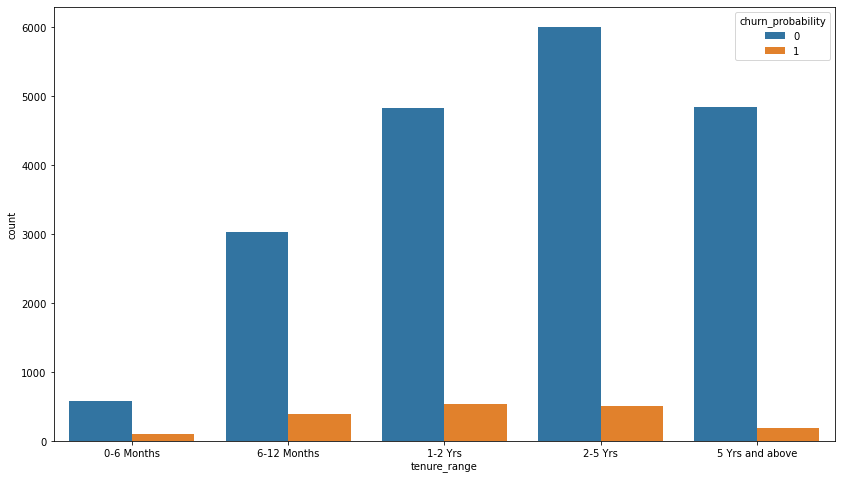

In [327]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn_probability',data = tenure_df)
plt.show()

### Analysis: It is evident that short/medium lived customers(1-2 yrs) are likely to churn the network

### Examining the Correlations between various predictor features

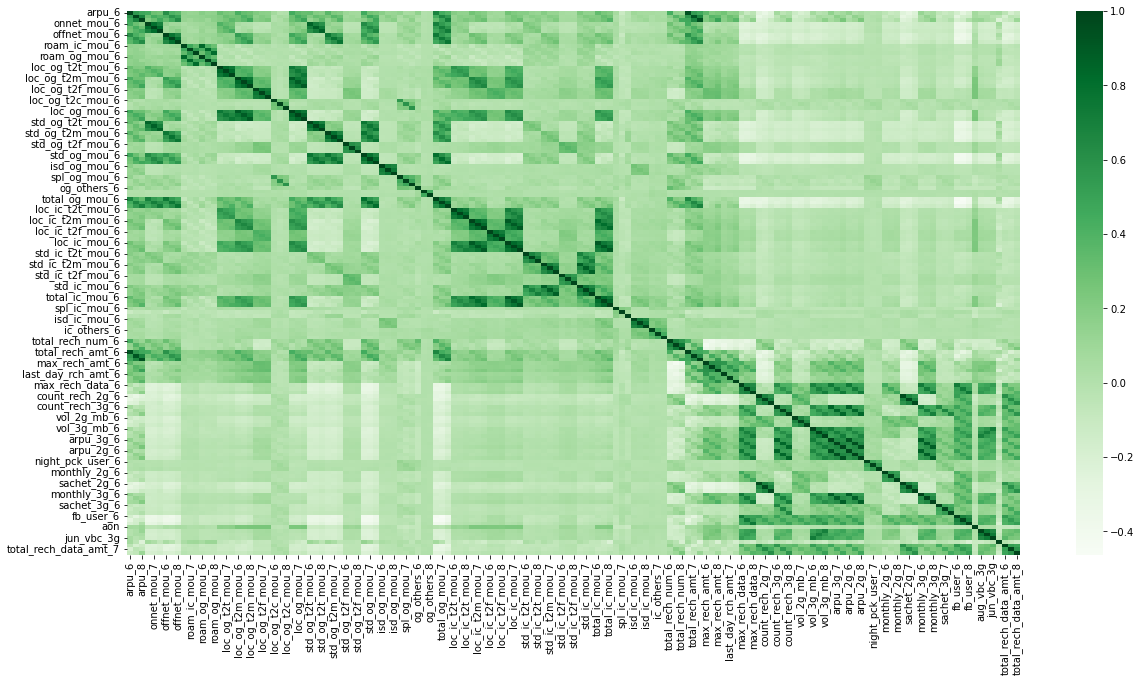

In [328]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom_filtered_df.corr(), cmap='Greens')
plt.show()

In [330]:
import re
mou_columns = [i for i in list(telecom_filtered_df.columns) if re.search(r'mou',i)]
mou_columns

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_i

In [333]:
g_columns = [i for i in list(telecom_filtered_df.columns) if re.search(r'2g|3g',i)]
g_columns

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [334]:
other_columns = [i for i in list(telecom_filtered_df.columns) if i not in mou_columns and i not in g_columns]
other_columns

['arpu_6',
 'arpu_7',
 'arpu_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'churn_probability',
 'total_rech_data_amt_6',
 'total_rech_data_amt_7',
 'total_rech_data_amt_8']

### Analysis: It is evident that there are correlations between various predictor features leading to multi collinearity 

In [335]:
telecom_filtered_df.shape
telecom_filtered_df1 = telecom_filtered_df.copy(deep=True)

In [336]:
telecom_filtered_df1.shape

(21013, 149)

In [337]:
#cor_matrix = telecom_filtered_df.corr().abs()

In [338]:
# Selecting the upper diagonal elements in the correlation matrix 
#as the diagonal elements are 1's and lower diagonal elements are mirror image of upper diagonal elements
#upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [339]:
# Dropping all predictor variables whose correlations are greater than 0.8
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
#print(to_drop)

In [340]:
#telecom_filtered_df.drop(to_drop, axis=1, inplace=True)

In [341]:
telecom_filtered_df.shape

(21013, 149)

In [342]:
# Preparing X and y from the telecom_filtered_df
y = telecom_filtered_df.pop('churn_probability')
X = telecom_filtered_df

In [343]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, stratify=y)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (14709, 148)
Dimension of X_test: (6304, 148)


In [344]:
# Scaling the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [345]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

In [347]:
len(numeric_cols), len(categorical_cols)

(142, 7)

In [348]:
# It is evident that class imbalance(churn vs non-churn) is present on the dataset, so lets balance it
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [349]:
#sm = SMOTE(random_state=42)
smk = SMOTETomek(random_state=42,sampling_strategy=0.5)
X_train_smote,y_train_smote = smk.fit_resample(X_train,y_train)

In [350]:
X_train_smote.shape

(20236, 148)

In [351]:
print("Imbalance in Training dataset after SMOTE :",(y_train_smote != 0).sum()/(y_train_smote == 0).sum())

Imbalance in Training dataset after SMOTE : 0.49996293825513305


### Model Building

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,plot_roc_curve,precision_score,recall_score
lr = LogisticRegression()

In [353]:
lr.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [354]:
# Prediction on train set
y_pred_train=lr.predict(X_train_smote)
acc=accuracy_score(y_train_smote, y_pred_train)
prec=precision_score(y_train_smote, y_pred_train)
rec=recall_score(y_train_smote, y_pred_train)

In [355]:
acc

0.8808559003755683

In [356]:
#Prediction on test set
y_pred_test=lr.predict(X_test)
test_acc=accuracy_score(y_test, y_pred_test)

In [357]:
test_acc

0.899746192893401

In [358]:
# Let's run the GLM stats model 
import statsmodels.api as sm
from sklearn import metrics
logm1 = sm.GLM(y_train_smote, sm.add_constant(X_train_smote), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                20236
Model:                            GLM   Df Residuals:                    20087
Model Family:                Binomial   Df Model:                          148
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6180.0
Date:                Wed, 15 Jun 2022   Deviance:                       12360.
Time:                        17:21:39   Pearson chi2:                 8.12e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.8426      0.102    -27.765      0.000      -3.043      -2.642
arpu_6                   -0.0965      0.083     -1.157      0.247      -0.260       0.067
arpu_7                    0.2294      0.085      2.688      0.007       0.062       0.397
arpu_8                    0.2857      0.095      3.009      0.003       0.100       0.472
onnet_mou_6               0.0048      0.136      0.035      0.972      -0.261       0.271
onnet_mou_7               0.4936      0.159      3.106      0.002       0.182       0.805
onnet_mou_8               0.5480      0.181      3.028      0.002       0.193       0.903
offnet_mou_6              0.5773      0.135      4.278      0.000       0.313       0.842
offnet_mou_7              0.3238      0.162      1.994      0.046       0.006       0.642
offnet_mou_8             -0.9626      0.178     -5.398      0.000      -1.312      -0.613
roam_ic_mou_6            -0.0820      0.049     -1.659      0.097      -0.179       0.015
roam_ic_mou_7             0.2338      0.047      5.023      0.000       0.143       0.325
roam_ic_mou_8             0.0025      0.041      0.062      0.950      -0.077       0.082
roam_og_mou_6             0.0456      0.049      0.925      0.355      -0.051       0.142
roam_og_mou_7            -0.2071      0.045     -4.612      0.000      -0.295      -0.119
roam_og_mou_8             0.2195      0.041      5.359      0.000       0.139       0.300
loc_og_t2t_mou_6          0.1202      0.121      0.991      0.322      -0.118       0.358
loc_og_t2t_mou_7         -0.0962      0.135     -0.712      0.477      -0.361       0.169
loc_og_t2t_mou_8         -0.6638      0.168     -3.947      0.000      -0.993      -0.334
loc_og_t2m_mou_6         -0.3352      0.171     -1.961      0.050      -0.670      -0.000
loc_og_t2m_mou_7          0.0834      0.182      0.458      0.647      -0.273       0.440
loc_og_t2m_mou_8         -0.4908      0.230     -2.133      0.033      -0.942      -0.040
loc_og_t2f_mou_6         -0.1477      0.053     -2.781      0.005      -0.252      -0.044
loc_og_t2f_mou_7         -0.0569      0.059     -0.969      0.332      -0.172       0.058
loc_og_t2f_mou_8          0.2205      0.058      3.833      0.000       0.108       0.333
loc_og_t2c_mou_6         -0.0669      0.033     -2.036      0.042      -0.131      -0.002
loc_og_t2c_mou_7         -0.1264      0.035     -3.610      0.000      -0.195      -0.058
loc_og_t2c_mou_8          0.1921      0.036      5.402      0.000       0.122       0.262
loc_og_mou_6              0.1337      0.239      0.559      0.576      -0.335       0.602
loc_og_mou_7             -0.5573      0.253     -2.202      0.028      -1.053      -0.061
loc_og_mou_8              2.2871      0.335      6.824      0.000       1.630       2.944
std_og_t2t_mou_6       

In [359]:
y_train_pred = res.predict(sm.add_constant(X_train_smote)).values.reshape(-1)

In [360]:
y_train_pred.shape

(20236,)

In [361]:
y_train_pred[:10]

array([1.52750942e-02, 3.69749040e-04, 1.40964415e-02, 5.67189671e-01,
       6.77233140e-01, 1.68745507e-02, 2.01359244e-01, 3.78390189e-02,
       3.32833289e-05, 2.16041220e-01])

In [362]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_smote.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.015275
1,0,0.000370
2,0,0.014096
3,1,0.567190
4,0,0.677233


In [363]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.015275,0
1,0,0.000370,0
2,0,0.014096,0
3,1,0.567190,1
4,0,0.677233,1


In [364]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015275,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000370,0,1,0,0,0,0,0,0,0,0,0
2,0,0.014096,0,1,0,0,0,0,0,0,0,0,0
3,1,0.567190,1,1,1,1,1,1,1,0,0,0,0
4,0,0.677233,1,1,1,1,1,1,1,1,0,0,0


In [365]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.333317  1.000000  0.000000
0.1   0.1  0.748715  0.962639  0.641761
0.2   0.2  0.822445  0.925723  0.770810
0.3   0.3  0.858519  0.888362  0.843599
0.4   0.4  0.875568  0.845070  0.890816
0.5   0.5  0.880905  0.796145  0.923282
0.6   0.6  0.872406  0.729874  0.943666
0.7   0.7  0.857828  0.649518  0.961975
0.8   0.8  0.825163  0.522165  0.976651
0.9   0.9  0.778563  0.355671  0.989993


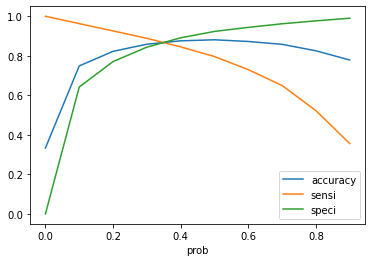

In [366]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [367]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.015275,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000370,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.014096,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.567190,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.677233,1,1,1,1,1,1,1,1,0,0,0,1


In [368]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [369]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

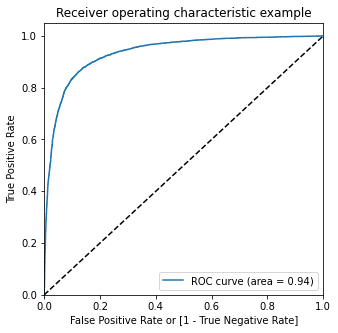

In [370]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [371]:
y_test_pred_prob = res.predict(sm.add_constant(X_test)).values.reshape(-1)

In [372]:
y_test_pred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred_prob})
y_test_pred.head()

,Churn,Churn_Prob
0,0,0.025880
1,0,0.053751
2,0,0.001563
3,0,0.659388
4,0,0.001044


In [373]:
y_test_pred['final_predicted'] = y_test_pred.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_test_pred.head()

,Churn,Churn_Prob,final_predicted
0,0,0.025880,0
1,0,0.053751,0
2,0,0.001563,0
3,0,0.659388,1
4,0,0.001044,0


In [374]:
acc_test=accuracy_score(y_test, y_test_pred['final_predicted'])
prec_test=precision_score(y_test, y_test_pred['final_predicted'])
rec_test=recall_score(y_test, y_test_pred['final_predicted'])
print('Accuracy of Logistic Regression Model on test set', acc_test)
print('Precision of Logistic Regression Model on test set', prec_test)
print('Recall of Logistic Regression Model on test set', rec_test)

Accuracy of Logistic Regression Model on test set 0.9010152284263959
Precision of Logistic Regression Model on test set 0.4417808219178082
Recall of Logistic Regression Model on test set 0.7413793103448276


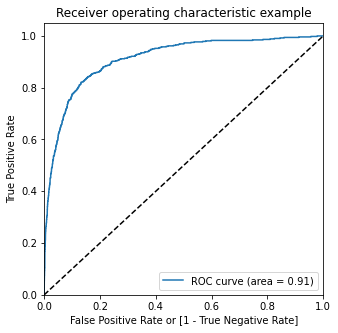

In [375]:
draw_roc(y_test_pred.Churn, y_test_pred.Churn_Prob)

## Decision trees

#### Hyper-parameter tuning for the Decision Tree

In [560]:
from sklearn.model_selection import GridSearchCV

In [561]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, class_weight={0:2, 1:1})

In [562]:
params = {
    "max_depth": [10,20,30],
    "min_samples_leaf": [10,20,50,75]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [563]:
%%time
#grid_search.fit(X_train_smote, y_train_smote)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Wall time: 10.1 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight={0: 2, 1: 1},
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [10, 20, 50, 75]},
             scoring='accuracy', verbose=1)

In [564]:
grid_search.best_score_

0.9410566107409299

In [565]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=10,
                       min_samples_leaf=75, random_state=42)

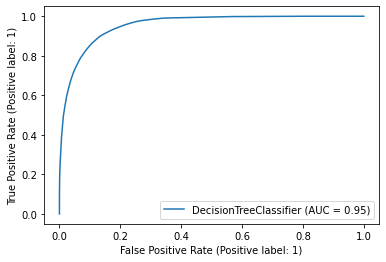

In [566]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [567]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print('Precision Score: ', precision_score(y_train, dt_classifier.predict(X_train)))
    print('Recall: ', recall_score(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    print('Precision Score: ', precision_score(y_test, dt_classifier.predict(X_test)))
    print('Recall: ', recall_score(y_test, dt_classifier.predict(X_test)))
    

In [568]:
evaluate_model(dt_best)

Train Accuracy : 0.9435039771568428
Train Confusion Matrix:
[[13409    94]
 [  737   469]]
Precision Score:  0.8330373001776199
Recall:  0.3888888888888889
--------------------------------------------------
Test Accuracy : 0.9365482233502538
Test Confusion Matrix:
[[5720   51]
 [ 349  184]]
Precision Score:  0.7829787234042553
Recall:  0.3452157598499062


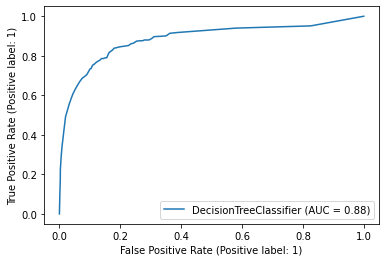

In [569]:
plot_roc_curve(dt_best, X_test, y_test)
plt.show()

## Using Random Forest

In [682]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score = True, bootstrap=True, class_weight={0:2, 1:1})

In [683]:
params = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [1000]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [684]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Wall time: 7min 30s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 2, 1: 1},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [1000]},
             scoring='accuracy', verbose=1)

In [685]:
grid_search.best_score_

0.942620200700887

In [686]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 2, 1: 1}, max_depth=10,
                       min_samples_leaf=5, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=42)

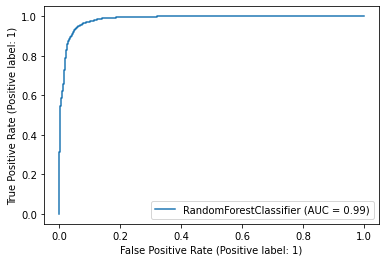

In [687]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [688]:
rf_best.feature_importances_

array([6.64202622e-03, 8.11421408e-03, 5.34356436e-02, 6.18269580e-03,
       5.51263609e-03, 8.65267654e-03, 5.33967785e-03, 6.40798705e-03,
       9.59624049e-03, 2.64842244e-03, 5.70766357e-03, 3.20764087e-02,
       2.45429025e-03, 7.64807804e-03, 3.63371061e-02, 4.47327826e-03,
       4.63800561e-03, 6.18533862e-03, 4.82896926e-03, 5.20669682e-03,
       1.09456631e-02, 2.12633303e-03, 1.88775347e-03, 3.11164320e-03,
       1.84351355e-03, 1.90007465e-03, 5.42875527e-03, 5.31442719e-03,
       5.33055885e-03, 1.21461220e-02, 4.58988734e-03, 4.32454854e-03,
       6.59470235e-03, 4.31220893e-03, 5.42522283e-03, 5.39198816e-03,
       6.12576940e-04, 3.32629421e-04, 4.41591236e-03, 5.26748967e-03,
       5.39033117e-03, 6.47029920e-03, 1.31375003e-03, 9.34074323e-04,
       1.44524894e-02, 3.14888109e-03, 4.07694941e-03, 4.08934249e-03,
       1.91406154e-03, 5.18632406e-04, 3.66075642e-02, 6.90959970e-03,
       7.09129118e-03, 4.41367472e-02, 4.58479783e-03, 5.82562377e-03,
      

In [689]:
imp_df = pd.DataFrame({
    "Varname": X_train_smote.columns,
    "Imp": rf_best.feature_importances_
})

In [690]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
80,total_ic_mou_8,0.076949
2,arpu_8,0.053436
95,total_rech_amt_8,0.045915
53,total_og_mou_8,0.044137
98,max_rech_amt_8,0.044101
50,og_others_8,0.036608
14,roam_og_mou_8,0.036337
11,roam_ic_mou_8,0.032076
65,loc_ic_mou_8,0.022839
59,loc_ic_t2m_mou_8,0.018103


In [691]:
evaluate_model(rf_best)

Train Accuracy : 0.9551974981303963
Train Confusion Matrix:
[[13467    36]
 [  623   583]]
Precision Score:  0.9418416801292407
Recall:  0.4834162520729685
--------------------------------------------------
Test Accuracy : 0.9359137055837563
Test Confusion Matrix:
[[5722   49]
 [ 355  178]]
Precision Score:  0.7841409691629956
Recall:  0.3339587242026266


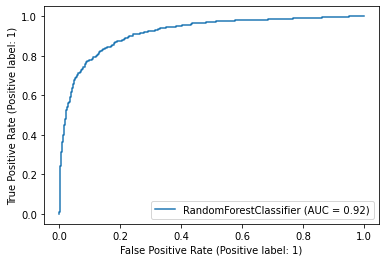

In [581]:
plot_roc_curve(rf_best, X_test, y_test)
plt.show()

## XG BOOST

In [692]:
from xgboost import XGBClassifier  # Load this xgboost
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split

In [693]:
xgb_cf = XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [694]:
 #A parameter grid for XGBoost
params = {
        'n_estimators' : [500], # no of trees 
        'learning_rate' : [0.05],  # eta
        'subsample': [0.6],
        'max_depth': [10]
       }
folds = 4
grid_search = GridSearchCV(xgb_cf, param_grid=params, scoring='accuracy', n_jobs=-1, cv=folds)

In [695]:
%%time
grid_search.fit(X_train_smote, y_train_smote)

Wall time: 2min 37s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [10],
                         'n_estimators': [500], 'subsample': [0.6]},
             scoring='accuracy')

In [696]:
print('\n Best estimator:')
print(grid_search.best_estimator_)
print(grid_search.best_score_ )
print('\n Best hyperparameters:')
print(grid_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.9439122734787311

 Best hyperparameters:
{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.6}


In [697]:
y_test_pred_xgb = grid_search.predict(X_test)
accuracy_score(y_test, y_test_pred_xgb)

0.9373413705583756

In [668]:
test_kaggle = pd.read_csv('test.csv')
test_kaggle.shape

(30000, 171)

In [669]:
test_kaggle.set_index('id', inplace=True)

In [670]:
test_kaggle['total_rech_data_amt_6'] = test_kaggle['av_rech_amt_data_6'] * test_kaggle['total_rech_data_6']
test_kaggle['total_rech_data_amt_7'] = test_kaggle['av_rech_amt_data_7'] * test_kaggle['total_rech_data_7']
test_kaggle['total_rech_data_amt_8'] = test_kaggle['av_rech_amt_data_8'] * test_kaggle['total_rech_data_8']

In [671]:
test_kaggle.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'], axis=1, inplace=True)

In [672]:
new_vars = telecom_filtered_df.columns

In [673]:
submission_df = test_kaggle[new_vars]

In [674]:
categorical_cols = []
numeric_cols = []
datetime_cols = []
for col in list(submission_df.columns):
    if submission_df[col].dtype in ["int64", "float64"]:
        if len(submission_df[col].value_counts()) == 2:
            categorical_cols.append(col)
        else:
            numeric_cols.append(col)
    else:
        datetime_cols.append(col)

In [675]:
submission_df[numeric_cols] = mean_imputer.transform(submission_df[numeric_cols])
submission_df[categorical_cols] = submission_df[categorical_cols].fillna(0)

In [676]:
submission_df[numeric_cols]  = scaler.transform(submission_df[numeric_cols])

In [677]:
len(numeric_cols), len(categorical_cols)

(142, 6)

In [678]:
submission_df['churn_probability'] = rf_best.predict(submission_df)

In [679]:
submission_df.reset_index(inplace=True)

In [680]:
output = submission_df[['id', 'churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [681]:
output.to_csv('submission_rf_15jun.csv',index=False)

### Applying PCA

In [596]:
# Preparing X and y from the telecom_filtered_df1
telecom_filtered_df1.shape

(21013, 148)

In [428]:
# Preparing X and y from the telecom_filtered_df
y = telecom_filtered_df1.pop('churn_probability')
X = telecom_filtered_df1

In [597]:
# split the dateset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (14709, 148)
Dimension of X_test: (6304, 148)


In [598]:
categorical_cols = []
numeric_cols = []
datetime_cols = []
for col in list(telecom_filtered_df1.columns):
    if telecom_filtered_df1[col].dtype in ["int64", "float64"]:
        if len(telecom_filtered_df1[col].value_counts()) == 2:
            categorical_cols.append(col)
        else:
            numeric_cols.append(col)
    else:
        datetime_cols.append(col)

In [599]:
numeric_cols.extend(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'])
categorical_cols = [x for x in categorical_cols if x not in ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']]

In [600]:
len(numeric_cols), len(categorical_cols)

(142, 6)

In [601]:
scaler = StandardScaler()

In [602]:
list(numeric_cols)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [603]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

In [604]:
len(numeric_cols)

142

In [605]:
#sm = SMOTE(random_state=42)
#smk = SMOTETomek(random_state=42,sampling_strategy=0.5)
#X_train_smote,y_train_smote = smk.fit_resample(X_train,y_train)
X_train_smote,y_train_smote = X_train,y_train

In [606]:
X_train_smote.shape

(14709, 148)

In [607]:
from sklearn.decomposition import PCA

In [608]:
pca = PCA(random_state=42)

In [609]:
pca.fit(X_train_smote)

PCA(random_state=42)

In [610]:
pca.components_

array([[ 1.35156953e-01,  1.44389591e-01,  1.34752754e-01, ...,
        -1.08933962e-01, -1.07478708e-01, -8.67319710e-02],
       [ 3.55199858e-02,  3.75601101e-02,  5.97109064e-02, ...,
         6.76608774e-02,  6.33655864e-02,  7.15382082e-02],
       [ 9.71292036e-02,  1.25056423e-01,  1.15855145e-01, ...,
         8.99231548e-03,  1.27313000e-02,  2.61944603e-02],
       ...,
       [ 1.67465101e-04,  3.36292061e-04, -9.27358010e-04, ...,
         2.36611204e-03,  1.83374886e-03,  3.28501681e-03],
       [ 2.86495200e-04, -7.00459712e-04,  2.53631989e-04, ...,
         1.10682891e-03, -4.64749238e-04, -9.73955427e-04],
       [-8.68031565e-06,  7.40468785e-04, -4.10430479e-04, ...,
         1.85828139e-04, -1.25597457e-03,  2.28314902e-03]])

In [611]:
pca.explained_variance_ratio_

array([1.31776426e-01, 1.16149868e-01, 7.12532876e-02, 4.71767219e-02,
       4.27626097e-02, 3.00585184e-02, 2.71215450e-02, 2.49734035e-02,
       2.40329600e-02, 2.22723173e-02, 2.12493556e-02, 1.88072332e-02,
       1.79181381e-02, 1.60072071e-02, 1.49993946e-02, 1.46460590e-02,
       1.42281380e-02, 1.36083477e-02, 1.33937125e-02, 1.30470753e-02,
       1.17315523e-02, 1.04908233e-02, 9.72575541e-03, 9.49255327e-03,
       9.03856658e-03, 8.85474144e-03, 8.66826975e-03, 7.96433732e-03,
       7.89558865e-03, 7.67459236e-03, 6.95322409e-03, 6.85234631e-03,
       6.45028988e-03, 6.31897653e-03, 6.16116473e-03, 5.95114843e-03,
       5.92363343e-03, 5.58667101e-03, 5.40062374e-03, 5.30313426e-03,
       5.18553995e-03, 5.04286787e-03, 4.85710803e-03, 4.76675419e-03,
       4.62026667e-03, 4.50611220e-03, 4.20983681e-03, 4.12086806e-03,
       4.01739913e-03, 3.87991617e-03, 3.82958854e-03, 3.72401341e-03,
       3.62782769e-03, 3.40328530e-03, 3.31341830e-03, 3.24023971e-03,
      

In [612]:
import matplotlib.pyplot as plt

<BarContainer object of 148 artists>

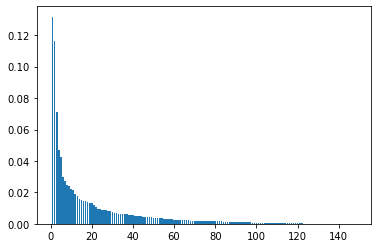

In [613]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [614]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

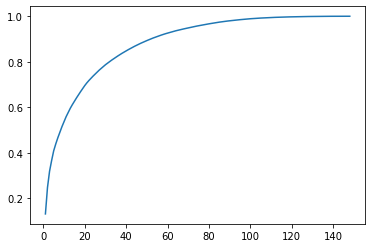

In [615]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [616]:
pc2 = PCA(n_components=100, random_state=42)

In [617]:
##first fitting and invert the eigen vectors or PC and multiplying the data set
X_train_reduced = pc2.fit_transform(X_train_smote)

In [618]:
X_train_reduced.shape

(14709, 100)

In [619]:
X_test_reduced = pc2.transform(X_test)

In [620]:
import statsmodels.api as sm
from sklearn import metrics
logm2 = sm.GLM(y_train_smote, sm.add_constant(X_train_reduced), family = sm.families.Binomial())
res1 = logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                14709
Model:                            GLM   Df Residuals:                    14608
Model Family:                Binomial   Df Model:                          100
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.7
Date:                Wed, 15 Jun 2022   Deviance:                       5239.4
Time:                        19:25:06   Pearson chi2:                 7.91e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9899      0.078    -51.266      0.000      -4.142      -3.837
x1            -0.1248      0.014     -8.807      0.000      -0.153      -0.097
x2            -0.2507      0.016    -15.834      0.000      -0.282      -0.220
x3             0.0895      0.018      4.933      0.000       0.054       0.125
x4            -0.3228      0.023    -13.892      0.000      -0.368      -0.277
x5            -0.0093      0.024     -0.387      0.699      -0.056       0.038
x6             0.0475      0.025      1.910      0.056      -0.001       0.096
x7            -0.4219      0.027    -15.852      0.000      -0.474      -0.370
x8             0.2881      0.022     13.067      0.000       0.245       0.331
x9             0.1046      0.027      3.920      0.000       0.052       0.157
x10            0.0815      0.031      2.628      0.009       0.021       0.142
x11           -0.2479      0.027     -9.112      0.000      -0.301      -0.195
x12            0.0207      0.026      0.800      0.424      -0.030       0.071
x13            0.0259      0.039      0.669      0.503      -0.050       0.102
x14            0.0923      0.036      2.590      0.010       0.022       0.162
x15           -0.0232      0.031     -0.749      0.454      -0.084       0.037
x16           -0.0891      0.037     -2.425      0.015      -0.161      -0.017
x17            0.1586      0.038      4.206      0.000       0.085       0.233
x18           -0.3201      0.031    -10.332      0.000      -0.381      -0.259
x19            0.0101      0.044      0.231      0.817      -0.076       0.096
x20           -0.1044      0.037     -2.834      0.005      -0.177      -0.032
x21           -0.0521      0.045     -1.171      0.242      -0.139       0.035
x22           -0.1072      0.076     -1.406      0.160      -0.257       0.042
x23            0.0964      0.053      1.835      0.067      -0.007       0.199
x24           -0.0069      0.056     -0.124      0.901      -0.117       0.103
x25           -0.0391      0.031     -1.263      0.207      -0.100       0.022
x26            0.1458      0.036      3.995      0.000       0.074       0.217
x27            0.1731      0.040      4.288      0.000       0.094       0.252
x28           -0.1315      0.044     -2.967      0.003      -0.218      -0.045
x29            0.0163      0.050      0.326      0.745      -0.082       0.115
x30           -0.1265      0.043     -2.972      0.003      -0.210      -0.043
x31           -0.2158      0.040     -5.371      0.000      -0.295      -0.137
x32           -0.2069      0.055     -3.764      0.000      -0.315      -0.099
x33           -0.2006      0.055     -3.626      0.000      -0.309      -0.092
x34           -0.0057      0.043     -0.134      0.894      -0.090       0.078
x35            0.0719      0.047      1.517      0.129      -0.021       0.165
x3

In [621]:
y_train_pred_lr_pca = res1.predict(sm.add_constant(X_train_reduced)).reshape(-1)

In [622]:
y_train_pred_lr_pca.shape

(14709,)

In [623]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_smote.values, 'Churn_Prob':y_train_pred_lr_pca})
y_train_pred_final.head()

,Churn,Churn_Prob
0,1,0.059962
1,0,0.007623
2,0,0.000596
3,0,0.000116
4,0,0.549714


In [624]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.059962,0
1,0,0.007623,0
2,0,0.000596,0
3,0,0.000116,0
4,0,0.549714,1


In [625]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.059962,0,1,0,0,0,0,0,0,0,0,0
1,0,0.007623,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000596,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000116,0,1,0,0,0,0,0,0,0,0,0
4,0,0.549714,1,1,1,1,1,1,1,0,0,0,0


In [626]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081991  1.000000  0.000000
0.1   0.1  0.850092  0.803483  0.854255
0.2   0.2  0.908287  0.703980  0.926535
0.3   0.3  0.927187  0.604478  0.956010
0.4   0.4  0.933714  0.492537  0.973117
0.5   0.5  0.934258  0.373134  0.984374
0.6   0.6  0.929635  0.221393  0.992890
0.7   0.7  0.924332  0.111111  0.996964
0.8   0.8  0.920253  0.038143  0.999037
0.9   0.9  0.918553  0.006633  1.000000


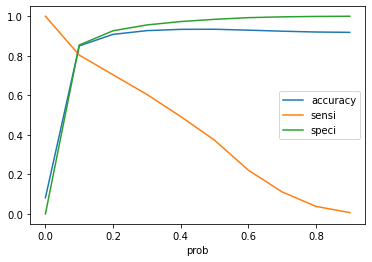

In [627]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [628]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.059962,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.007623,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000596,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000116,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.549714,1,1,1,1,1,1,1,0,0,0,0,1


In [629]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

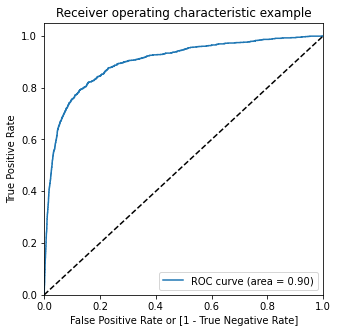

In [630]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [631]:
y_test_pred_prob = res1.predict(sm.add_constant(X_test_reduced)).reshape(-1)

In [632]:
y_test_pred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred_prob})
y_test_pred.head()

,Churn,Churn_Prob
0,0,0.073451
1,0,0.037516
2,0,0.006440
3,0,0.054332
4,0,0.001333


In [633]:
y_test_pred['final_predicted'] = y_test_pred.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_test_pred.head()

,Churn,Churn_Prob,final_predicted
0,0,0.073451,0
1,0,0.037516,0
2,0,0.006440,0
3,0,0.054332,0
4,0,0.001333,0


In [634]:
acc_test=accuracy_score(y_test, y_test_pred['final_predicted'])
prec_test=precision_score(y_test, y_test_pred['final_predicted'])
rec_test=recall_score(y_test, y_test_pred['final_predicted'])
print('Accuracy of Logistic Regression Model on test set', acc_test)
print('Precision of Logistic Regression Model on test set', prec_test)
print('Recall of Logistic Regression Model on test set', rec_test)

Accuracy of Logistic Regression Model on test set 0.9313134517766497
Precision of Logistic Regression Model on test set 0.6748251748251748
Recall of Logistic Regression Model on test set 0.3621013133208255


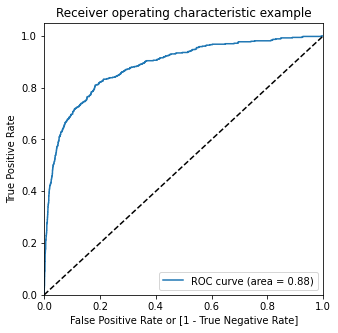

In [635]:
draw_roc(y_test_pred.Churn, y_test_pred.Churn_Prob)

In [636]:
dt_pca = DecisionTreeClassifier(random_state=42, class_weight={0:2,1:1})

In [637]:
params = {
    "max_depth": [10,20,30],
    "min_samples_leaf": [10,20,50,75]
}
grid_search = GridSearchCV(estimator=dt_pca,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [638]:
%%time
grid_search.fit(X_train_reduced, y_train_smote)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Wall time: 12.6 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight={0: 2, 1: 1},
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [10, 20, 50, 75]},
             scoring='accuracy', verbose=1)

In [639]:
grid_search.best_score_

0.9197090529241114

In [640]:
dt_pca_best = grid_search.best_estimator_
dt_pca_best

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=10,
                       min_samples_leaf=75, random_state=42)

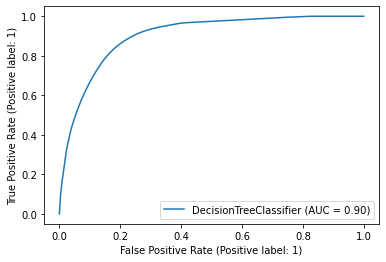

In [641]:
plot_roc_curve(dt_pca_best, X_train_reduced, y_train_smote)
plt.show()

In [642]:
def evaluate_model_pca(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_smote, dt_classifier.predict(X_train_reduced)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_smote,dt_classifier.predict(X_train_reduced)))
    print('Precision Score: ', precision_score(y_train_smote, dt_classifier.predict(X_train_reduced)))
    print('Recall: ', recall_score(y_train_smote, dt_classifier.predict(X_train_reduced)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test_reduced)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test_reduced)))
    print('Precision Score: ', precision_score(y_test, dt_classifier.predict(X_test_reduced)))
    print('Recall: ', recall_score(y_test, dt_classifier.predict(X_test_reduced)))

In [643]:
evaluate_model_pca(dt_pca_best)

Train Accuracy : 0.9220205316472908
Train Confusion Matrix:
[[13460    43]
 [ 1104   102]]
Precision Score:  0.7034482758620689
Recall:  0.0845771144278607
--------------------------------------------------
Test Accuracy : 0.9152918781725888
Test Confusion Matrix:
[[5733   38]
 [ 496   37]]
Precision Score:  0.49333333333333335
Recall:  0.06941838649155722


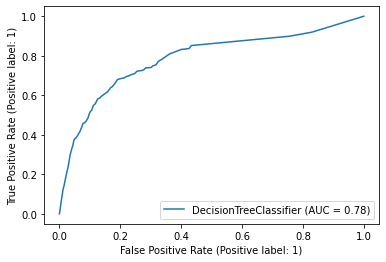

In [644]:
plot_roc_curve(dt_pca_best, X_test_reduced, y_test)
plt.show()

In [645]:
rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap=True, oob_score=True, class_weight={0:2,1:1})

In [646]:
params = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [100,300,500]
}
grid_search = GridSearchCV(estimator=rf_pca,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [647]:
%%time
grid_search.fit(X_train_reduced, y_train_smote)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Wall time: 10min 57s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 2, 1: 1},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [648]:
grid_search.best_score_

0.9192330844869486

In [649]:
rf_pca_best = grid_search.best_estimator_
rf_pca_best

RandomForestClassifier(class_weight={0: 2, 1: 1}, max_depth=30,
                       min_samples_leaf=5, n_jobs=-1, oob_score=True,
                       random_state=42)

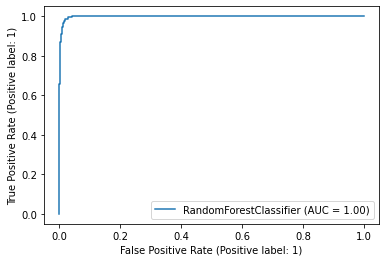

In [650]:
plot_roc_curve(rf_pca_best, X_train_reduced, y_train_smote)
plt.show()

In [651]:
evaluate_model_pca(rf_pca_best)

Train Accuracy : 0.9387449860629546
Train Confusion Matrix:
[[13503     0]
 [  901   305]]
Precision Score:  1.0
Recall:  0.25290215588723053
--------------------------------------------------
Test Accuracy : 0.9160850253807107
Test Confusion Matrix:
[[5765    6]
 [ 523   10]]
Precision Score:  0.625
Recall:  0.01876172607879925


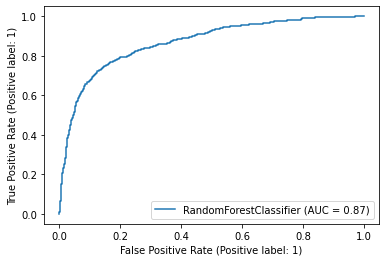

In [652]:
plot_roc_curve(rf_pca_best, X_test_reduced, y_test)
plt.show()

In [490]:
test_kaggle = pd.read_csv('test.csv')

In [491]:
test_kaggle.shape

(30000, 171)

In [492]:
test_kaggle.set_index('id', inplace=True)

In [493]:
test_kaggle['total_rech_data_amt_6'] = test_kaggle['av_rech_amt_data_6'] * test_kaggle['total_rech_data_6']
test_kaggle['total_rech_data_amt_7'] = test_kaggle['av_rech_amt_data_7'] * test_kaggle['total_rech_data_7']
test_kaggle['total_rech_data_amt_8'] = test_kaggle['av_rech_amt_data_8'] * test_kaggle['total_rech_data_8']

In [494]:
test_kaggle.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'], axis=1, inplace=True)

In [495]:
new_vars = telecom_filtered_df1.columns

In [496]:
len(new_vars)

148

In [497]:
submission_df = test_kaggle[new_vars]

In [498]:
submission_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 69999 to 99998
Data columns (total 148 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    arpu_6                 30000 non-null  float64
 1    arpu_7                 30000 non-null  float64
 2    arpu_8                 30000 non-null  float64
 3    onnet_mou_6            28831 non-null  float64
 4    onnet_mou_7            28828 non-null  float64
 5    onnet_mou_8            28325 non-null  float64
 6    offnet_mou_6           28831 non-null  float64
 7    offnet_mou_7           28828 non-null  float64
 8    offnet_mou_8           28325 non-null  float64
 9    roam_ic_mou_6          28831 non-null  float64
 10   roam_ic_mou_7          28828 non-null  float64
 11   roam_ic_mou_8          28325 non-null  float64
 12   roam_og_mou_6          28831 non-null  float64
 13   roam_og_mou_7          28828 non-null  float64
 14   roam_og_mou_8          28325 non

In [499]:
categorical_cols = []
numeric_cols = []
datetime_cols = []
for col in list(submission_df.columns):
    if submission_df[col].dtype in ["int64", "float64"]:
        if len(submission_df[col].value_counts()) == 2:
            categorical_cols.append(col)
        else:
            numeric_cols.append(col)
    else:
        datetime_cols.append(col)

In [500]:
categorical_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [501]:
submission_df[numeric_cols] = mean_imputer.transform(submission_df[numeric_cols])

In [502]:
categorical_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [503]:
submission_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 69999 to 99998
Data columns (total 148 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    arpu_6                 30000 non-null  float64
 1    arpu_7                 30000 non-null  float64
 2    arpu_8                 30000 non-null  float64
 3    onnet_mou_6            30000 non-null  float64
 4    onnet_mou_7            30000 non-null  float64
 5    onnet_mou_8            30000 non-null  float64
 6    offnet_mou_6           30000 non-null  float64
 7    offnet_mou_7           30000 non-null  float64
 8    offnet_mou_8           30000 non-null  float64
 9    roam_ic_mou_6          30000 non-null  float64
 10   roam_ic_mou_7          30000 non-null  float64
 11   roam_ic_mou_8          30000 non-null  float64
 12   roam_og_mou_6          30000 non-null  float64
 13   roam_og_mou_7          30000 non-null  float64
 14   roam_og_mou_8          30000 non

In [504]:
submission_df[categorical_cols] = submission_df[categorical_cols].fillna(0)

In [505]:
categorical_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [506]:
submission_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 69999 to 99998
Data columns (total 148 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    arpu_6                 30000 non-null  float64
 1    arpu_7                 30000 non-null  float64
 2    arpu_8                 30000 non-null  float64
 3    onnet_mou_6            30000 non-null  float64
 4    onnet_mou_7            30000 non-null  float64
 5    onnet_mou_8            30000 non-null  float64
 6    offnet_mou_6           30000 non-null  float64
 7    offnet_mou_7           30000 non-null  float64
 8    offnet_mou_8           30000 non-null  float64
 9    roam_ic_mou_6          30000 non-null  float64
 10   roam_ic_mou_7          30000 non-null  float64
 11   roam_ic_mou_8          30000 non-null  float64
 12   roam_og_mou_6          30000 non-null  float64
 13   roam_og_mou_7          30000 non-null  float64
 14   roam_og_mou_8          30000 non

In [508]:
submission_df[numeric_cols]  = scaler.transform(submission_df[numeric_cols])

In [509]:
submission_df_reduced = pc2.transform(submission_df)

In [510]:
submission_df['churn_probability'] = rf_pca_best.predict(submission_df_reduced)

In [511]:
submission_df.reset_index(inplace=True)

In [512]:
submission_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn_probability
0,69999,-1.414188,-1.490473,-1.233142,-0.636858,-0.668282,-0.614362,-0.841563,-0.913121,-0.845998,-0.315269,-0.277415,-0.280829,-0.340917,-0.316657,-0.309318,-0.399664,-0.443743,-0.416961,-0.768745,-0.831045,-0.823050,-0.494015,0.839180,-0.491451,-0.365177,-0.359158,-0.362775,-0.727443,-0.732144,-0.764442,-0.500439,-0.529626,-0.486264,-0.419824,-0.557221,-0.438098,-0.26985,-0.261059,-0.259843,-0.585413,-0.682274,-0.576820,-0.134129,-0.134996,-0.125017,-0.506942,-0.512939,-0.526611,-0.358908,-0.049915,-0.057096,-0.898636,-0.974967,-0.861222,-0.311921,-0.231027,-0.403339,-0.856383,-0.912397,-0.864402,-0.491718,-0.492556,-0.508415,-0.775391,-0.780410,-0.815679,-0.410298,-0.406811,-0.395169,-0.499079,-0.485179,-0.408129,-0.279878,-0.287442,-0.285198,-0.561028,-0.549708,-0.488592,-0.846075,-0.849941,-0.837449,3.582628,4.742699,4.018093,-0.267690,-0.277033,-0.274336,-0.222448,-0.229423,-0.230139,-0.885454,-0.846184,-0.751522,-1.403325,-1.404527,-1.202705,-0.968104,-1.162198,-1.055939,-0.695888,-0.674641,-0.907095,-0.467179,-0.473121,-0.401128,-0.38086,-0.387639,-0.321847,-0.331558,-0.331505,-0.278445,-0.516758,-0.509485,-0.464858,-0.545415,-0.566448,-0.542182,-0.328827,-0.333305,-0.290615,-0.345151,-0.345727,-0.296081,0.0,0.0,0.0,-0.525995,-0.537324,-0.508213,-0.42592,-0.425376,-0.411858,-0.332209,-0.32806,-0.292144,-1.267453,-0.51869,-0.523249,0.0,0.0,0.0,6.553516,-0.586343,-0.594699,-0.517846,340.928196,376.53323,414.529778,0
1,70000,-0.378992,-0.051153,-0.358894,-0.491032,-0.600594,-0.625607,0.394798,0.818377,0.259068,-0.315269,-0.277415,-0.280829,-0.340917,-0.316657,-0.309318,0.070709,-0.251137,-0.428637,1.970570,2.822378,1.532170,-0.421506,-0.495673,-0.491451,-0.365177,-0.359158,-0.370579,1.265616,1.651275,0.751585,-0.528465,-0.529626,-0.494854,-0.589691,-0.495511,-0.474247,-0.26985,-0.261059,-0.259843,-0.698192,-0.6

In [513]:
output = submission_df[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [514]:
output.to_csv('submission_pca_rf_15jun.csv',index=False)

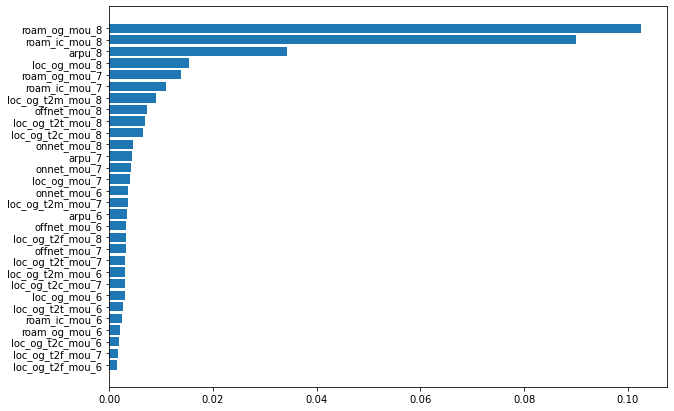

In [557]:
plt.figure(figsize=[10,7])
f_i = list(zip(telecom_filtered_df.columns,rf_best.feature_importances_))[:30]
f_i.sort(key = lambda x : x[1]) 
plt.barh([x[0] for x in f_i],[x[1] for x in f_i]) 
plt.show()

### Conclusions:

In [698]:
### Decrease in Total data recharge amount and Maximum recharge amount in month 8 is a strong indicator of churn.

### Decrease in incoming and outgoing minutes of usage in month 8 shows high churn probability.

### Decrease in local and roaming minutes of usage in month 8 shows high churn probability

### Decrease in ARPU in month 8 shown high churn probability

### New customers tend to churn easily.

### Random Forest produced the best prediction scores(among logistic regression, Decision tree and Random forest)